# Принятие решений в бизнесе на основе данных

## Описание данных

### Данные для первой части

Файл /datasets/hypothesis.csv

 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Данные для второй части

Файл /datasets/orders.csv

 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 
Файл /datasets/visitors.csv
 
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Описание проекта

### Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**

 - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

### Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Проанализируйте A/B-тест:
 - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
 - Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
 - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
 - Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Часть 1. Приоритизация гипотез

In [1]:
# импорт библиотек
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)
pd.set_option('display.width', 400)
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.gridspec as gridspec

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Рассчитаем фреймворк ICE для каждой гипотезы и сразу отсортируем по убыванию приоритета:

In [4]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [5]:
round(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False), 2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:**

Получается - самые перспективные гипотезы по фреймфорку ICE - 8, 0 и 7

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

Теперь посмотрим на RICE и так же отсортируем по убыванию:

In [6]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [7]:
round(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False), 2)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**
По фреймворку RICE самые перспективные гипотезы - 7, 2, 0 и 6

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

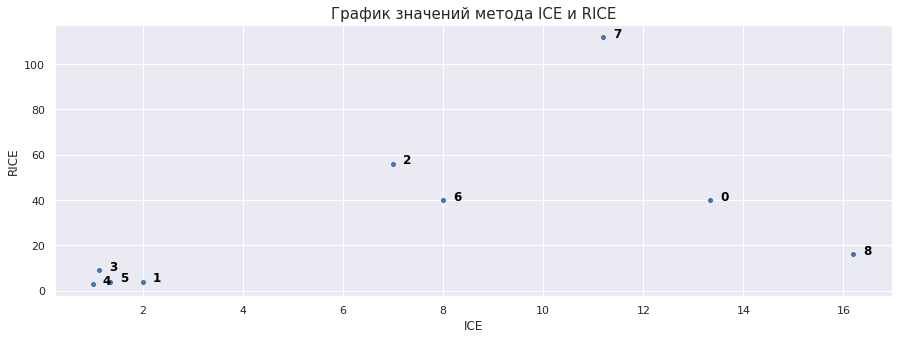

In [8]:
plt.figure(figsize=(15,5))
plt.title('График значений метода ICE и RICE', size=15)
sns.scatterplot(x=hypothesis['ICE'], y=hypothesis['RICE'])
for line in range(0,hypothesis.shape[0]):
     plt.text(hypothesis.ICE[line]+0.2, 
              hypothesis.RICE[line], 
              hypothesis.index[line], 
              horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

Исходя из графика мы можем сделать вывод что и для RICE и для ICE самыми перспективными гипотезами являются 7, 0, 2 и 6. Следовательно гипотезы 1, 3, 4 и 5 не будут полезными вовсе. Гипотеза 8 полезна только для ICE. 

Во фреймворке RICE сильно выбилась гипотеза 7. Это произошло потому что показатель reach у этой гипотезы равен 10. На втором месте гипотеза 2, у которой reach так же высокий и равен 8. Этот параметр помогает оценить охват пользователей, которых затронет изменение, поэтому использование этого метода предпочтительно.

## Часть 2. Анализ A/B-теста

Загрузим и подготовим данные:

In [9]:
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders['revenue'] = pd.to_numeric(orders['revenue'], downcast='signed')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
print('Количество дубликатов:', orders.duplicated().sum())

Количество дубликатов: 0


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['visitors'] = pd.to_numeric(visitors['visitors'], downcast='signed')

In [16]:
print('Количество дубликатов:', visitors.duplicated().sum())

Количество дубликатов: 0


Проверим, есть ли у нас пересекающиеся пользователи:

In [17]:
group_counter = orders.groupby('visitorId')['group'].nunique()
damaged_users = group_counter[group_counter > 1].index
print('Пользователи, попавшие в обе группы:', len(damaged_users))

Пользователи, попавшие в обе группы: 58


58 пользователей попали и в группу А и в группу В, их действия будут искажать результаты нашего А/В теста, удалим их

In [18]:
orders = orders[~orders['visitorId'].isin(damaged_users)]

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [19]:
#Создадим массив с уникальными парами значений дат и групп теста.
datesGroups = orders[['date', 'group']].drop_duplicates()

In [20]:
#Получим агрегированные кумулятивные данные по дням о заказах.
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                    orders['group'] == x['group'])]\
                                    .agg({'date':'max', 'group':'max', 'transactionId':pd.Series.nunique,
                                         'visitorId':pd.Series.nunique, 'revenue':'sum'}), axis=1)\
                                    .sort_values(by=['date', 'group'])

In [21]:
#Аналогично получим агрегированные кумулятивные данные по дням о посетителях магазина.
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                        visitors['group'] == x['group'])]\
                                      .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)\
                                        .sort_values(by=['date', 'group'])

In [22]:
#Объединим все кумулятивные данные в одну таблицу и переименуем названия столбцов.
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], 
                                        right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [23]:
#Разделим данные на кумулятивной выручки по двум группам.
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

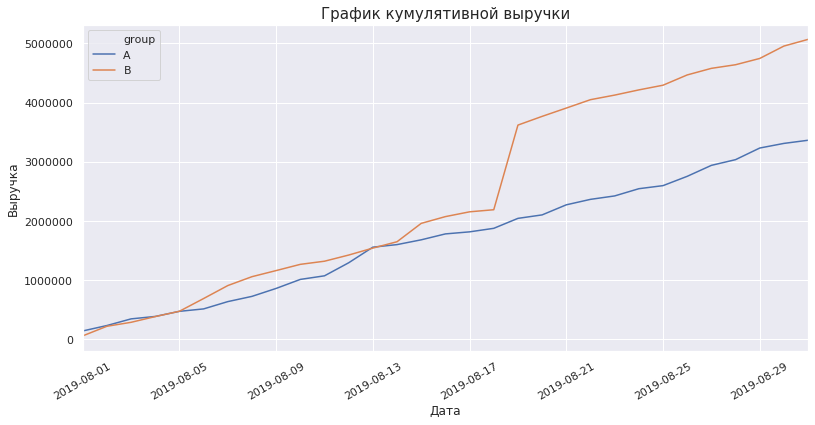

In [24]:
#Построим графики кумулятивной выручки по группам A и B.
plt.figure(figsize = (13,6))
plt.title('График кумулятивной выручки',size=15)
sns.lineplot(data=cumulativeData, x='date', y='revenue', hue='group')
plt.xlabel('Дата', size=12)
plt.ylabel('Выручка', size=12)
plt.xticks(rotation=30)
plt.xlim(np.datetime64('2019-08-01 00:00:00'), np.datetime64('2019-08-31 00:00:00')) ###
plt.show()

Обе выручки плавно и равномерно идут вверх до тех пор, пока в группе В не случается всплеск - либо наплыв заказов, либо повысился средний чек

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Построим график кумулятивного среднего чека по группам:

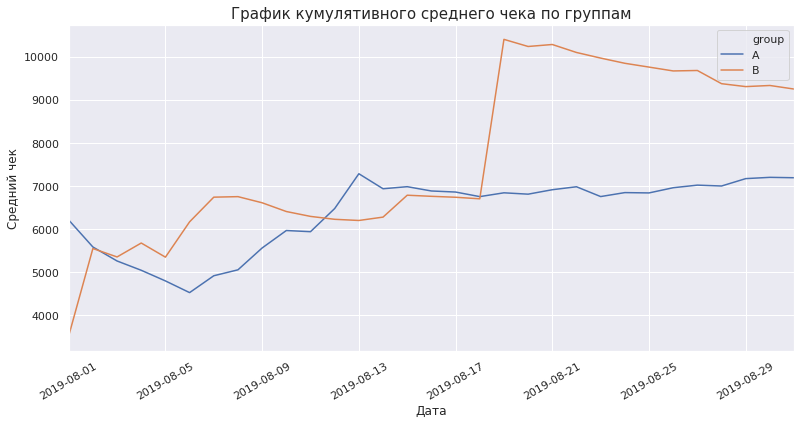

In [25]:
plt.figure(figsize=(13,6))
plt.title('График кумулятивного среднего чека по группам',size=15)
sns.lineplot(data=cumulativeData, x='date', y=cumulativeData['revenue']/cumulativeData['orders'], hue='group')
plt.xlabel('Дата', size=12)
plt.ylabel('Cредний чек', size=12)
plt.xlim(np.datetime64('2019-08-01 00:00:00'), np.datetime64('2019-08-31 00:00:00'))
plt.xticks(rotation=30)
plt.show()

По графику можно видеть плавный рост среднего чека по группам А и В. Однако 19-20 августа можно увидеть резкий рост по группе В. Скорее всего 19 числа кто-то совершил крупную покупку, которая в несколько раз превышает привычный средний чек. Это так же объясняется тем что после этого по группе В идет спад, так как скорее всего в следующие дни средний чек вернулся на свое место

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [26]:
#Соберем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

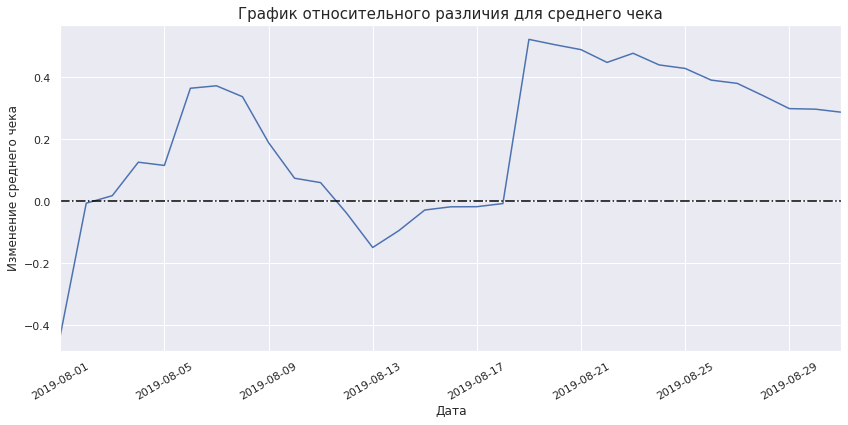

In [27]:
#Построим график относительного различия для среднего чека
plt.figure(figsize=(14, 6))
plt.title('График относительного различия для среднего чека', size=15)
sns.lineplot(data=mergedCumulativeRevenue, 
             x=mergedCumulativeRevenue['date'], 
             y=(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
             /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')
plt.axhline(y=0, color='black', linestyle='-.')
plt.xlim(np.datetime64('2019-08-01 00:00:00'), np.datetime64('2019-08-31 00:00:00'))
plt.show()

В нескольких точках график сильно отклоняется - это свидетельствует о том что в обеих выборках присутствуют выбросы(крупные чеки), которые "портят" всю картину

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Посчитаем кумулятивную конверсию:

In [28]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

#Конверсия по группе А
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
#Конверсия по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

Построим график кумулятивной конверсии:

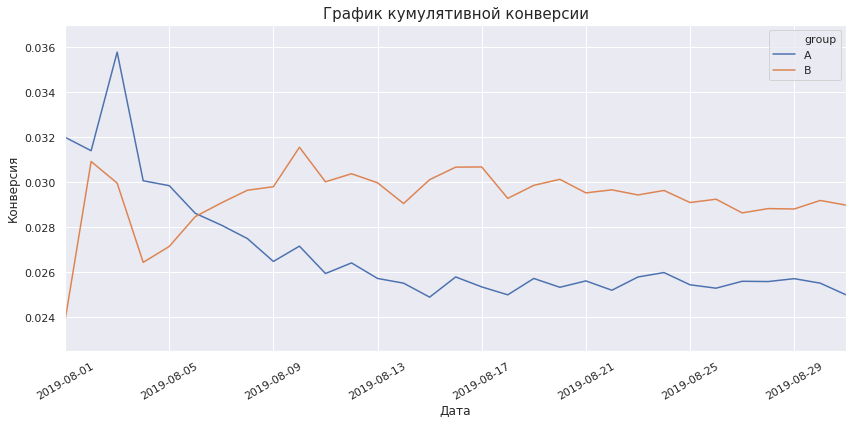

In [29]:
plt.figure(figsize = (14,6))
plt.title('График кумулятивной конверсии',size=15)
sns.lineplot(data=cumulativeData, x='date', y='conversion', hue='group')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=30)
plt.axis(["2019-08-01", '2019-08-31', 0.0225, 0.037])
plt.show()

На начало эксперимента конверсия группы А была больше, но примерно через неделю конверсия группы В стала больше, а конверсия группы А здорово просела

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

Объединим конверсии по группе А и группе В в одну таблицу:

In [30]:
mergedCumulativeConvesions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],left_on='date', right_on='date', how='left',
    suffixes=['A', 'B'])

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

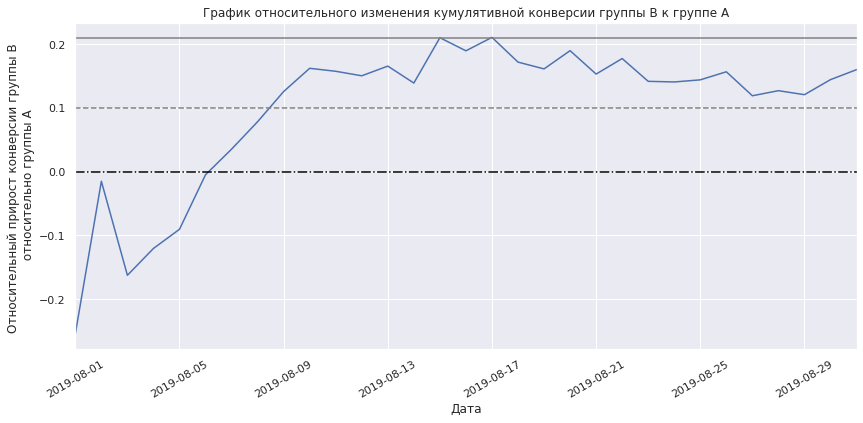

In [31]:
plt.figure(figsize=(14, 6))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
sns.lineplot(data=mergedCumulativeConvesions, x='date', 
             y=mergedCumulativeConvesions['conversionB']/mergedCumulativeConvesions['conversionA']-1)
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Относительный прирост конверсии группы B \n относительно группы A')
plt.axhline(y=0, color='black', linestyle='-.')
plt.axhline(y=0.21, color='grey', linestyle='-')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlim(np.datetime64('2019-08-01 00:00:00'), np.datetime64('2019-08-31 00:00:00'))
plt.show()

На начало теста конверсия группы В сильно проигрывала, затем показала серьезный рывок и опередила конверсию группы А. Но с течением времени начала понижаться. Делать выводы пока рано, необходим анализ аномалий

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [32]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False)\
                 .agg({'transactionId':pd.Series.nunique}))

ordersByUsers.columns = ['visitorId', 'orders']

Построим гистограмму и точечный график количества заказов по пользователям для того чтобы проанализировать выбросы.

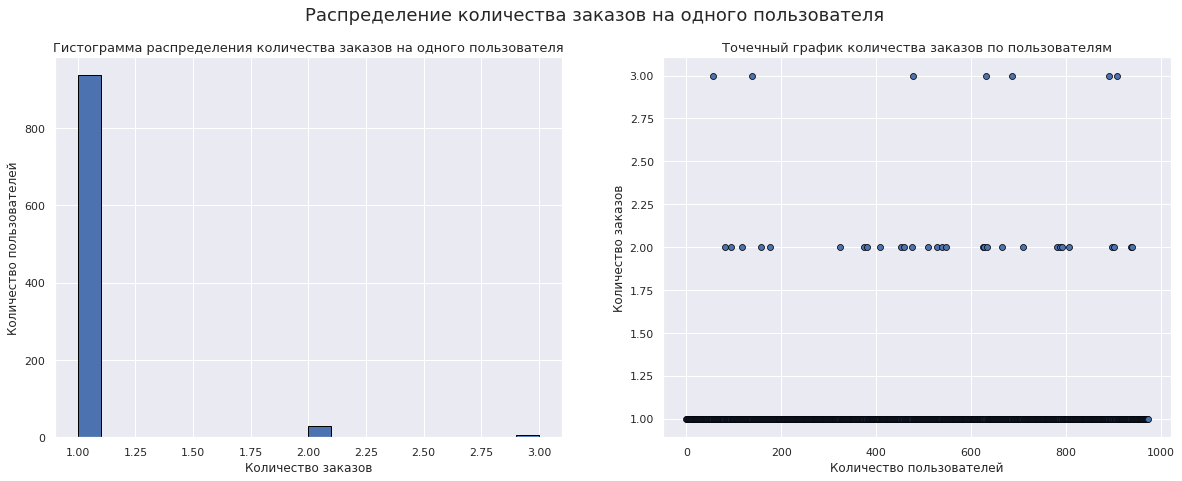

In [33]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
plt.suptitle('Распределение количества заказов на одного пользователя', size=18)

#Построение гистограммы
ordersByUsers['orders'].hist(bins=20, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения количества заказов на одного пользователя', size=13)
axs[0].set_xlabel('Количество заказов')
axs[0].set_ylabel('Количество пользователей')

#Построение точечного графика
x_values = pd.Series(range(0,len(ordersByUsers)))
sns.scatterplot(x=x_values, y=ordersByUsers['orders'], edgecolor='black')
axs[1].set_title('Точечный график количества заказов по пользователям', size=13)
axs[1].set_xlabel('Количество пользователей')
axs[1].set_ylabel('Количество заказов')

plt.show()

По графикам видим, что наибольшее количество пользователей (около 950) совершили 1 покупку. Пользователей, которые совершили 2 покупки меньше - около 50. Все, что свыше 2-х покупок - скорее всего выбросы.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей

Посчитаем выборочные перцентили количества заказов на одного пользователя

In [34]:
print('90, 95 и 99 перцентили:', np.percentile(ordersByUsers['orders'], [90, 95, 99]))

90, 95 и 99 перцентили: [1. 1. 2.]


Не более 5% пользователей оформляли больше двух заказов. И 10% пользователей заказывали более 1 раза. Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеим аномальных пользователей по ней.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения

Построим гистограмму и точеченый график распределния заказов:

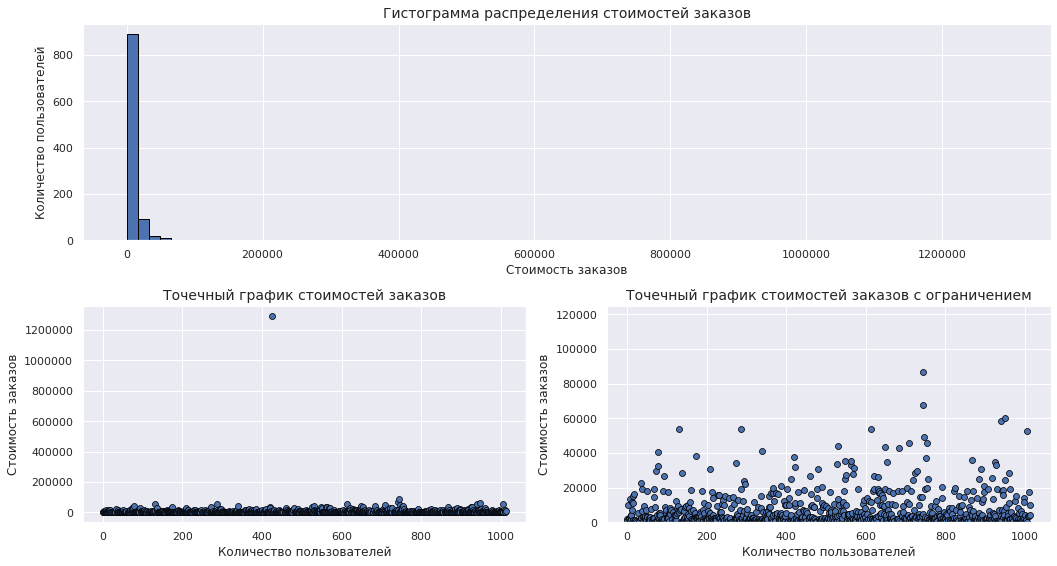

In [35]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(gs[0, :]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1])

#Построение гистограммы
ax1.hist(orders['revenue'], bins=80, edgecolor='black')
ax1.set_title('Гистограмма распределения стоимостей заказов', fontsize=14)
ax1.set_xlabel('Cтоимость заказов')
ax1.set_ylabel('Количество пользователей')

#Построение точечного графика
x_values2 = pd.Series(range(0,len(orders['revenue'])))
sns.scatterplot(x=x_values2, y=orders['revenue'], edgecolor='black', ax=ax2)
ax2.set_title('Точечный график стоимостей заказов', size=14)
ax2.set_xlabel('Количество пользователей')
ax2.set_ylabel('Cтоимость заказов')

#Построение точечного графика c ограничением
sns.scatterplot(x=x_values2, y=orders['revenue'], edgecolor='black', ax=ax3)
ax3.set_title('Точечный график стоимостей заказов с ограничением', size=14)
ax3.set_xlabel('Количество пользователей')
ax3.set_ylabel('Cтоимость заказов')
ax3.set_ylim(0, 125000)


plt.tight_layout(pad=1)
plt.show()

По графикам видно что большинство заказов меньше 40000 руб. Можно предположить, что заказы свыше этой суммы - выбросы.
Для проверки посчитаем выборочные перцентили стоимости заказов на одного пользователя

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [36]:
print('90, 95 и 99 перцентили:', np.percentile(orders['revenue'], [90, 95, 99]))

90, 95 и 99 перцентили: [17990. 26785. 53904.]


5% заказов превышает отметку 26785 руб и всего 1% дороже 53904 руб. Логично чтобы граница с аномальными значениями проходила выше 26785 руб.

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [37]:
#Найдем  количество посетителей в выбранную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Найдем количество посетителей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [38]:
#Найдем  количество посетителей в выбранную дату в группе B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Найдем количество посетителей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                           .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [39]:
#Найдем количество и стоимость заказов по группе A
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
                .groupby('date', as_index=False)\
                .agg({'transactionId':pd.Series.nunique, 'revenue':'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#Найдем количество и стоимость заказов по группе A до выбранной даты включительно
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
                                        .agg({'date':'max', 'ordersPerDateA':'sum', 'revenuePerDateA':'sum'}), 
                                        axis=1)\
                                        .sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [40]:
#Найдем количество и стоимость заказов по группе B
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
                .groupby('date', as_index=False)
                .agg({'transactionId':pd.Series.nunique, 'revenue':'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#Найдем количество и стоимость заказов по группе B до выбранной даты включительно
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                                        .agg({'date':'max', 'ordersPerDateB':'sum', 'revenuePerDateB':'sum'}), 
                                        axis=1)\
                                        .sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим полученные данные в одну таблицу:

In [41]:
ordersvisitorsMerge = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
                .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
                .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
                .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
                .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
                .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
                .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

Теперь создадим две таблицы ordersByUsersA и ordersByUsersB. В них укажем число совершённых заказов для пользователей, которые заказывали хотя бы 1 раз

In [42]:
ordersByUsersA = (orders[orders['group'] == 'A']
                 .groupby('visitorId', as_index=False)
                    .agg({'transactionId':pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
                 .groupby('visitorId', as_index=False)
                    .agg({'transactionId':pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [43]:
sampleA = pd.concat([ordersByUsersA['orders'],
                    pd.Series(0, index=np.arange(ordersvisitorsMerge['visitorsPerDateA'].sum() 
                                                 - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                    pd.Series(0, index=np.arange(ordersvisitorsMerge['visitorsPerDateB'].sum()
                                                - len(ordersByUsersB['orders'])), name='orders')], axis=0)

Проведем тест Манна-Уитни для проверки гипотезы о значимых различиях между сравниваемыми выборками. Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

Также выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

Нулевая гипотеза H0 - значимые различия между сравниваемыми выборками отсутствуют Альтернативная гипотеза H1 - значимые различия между сравниваемыми выборками есть Критический уровень статистической значимости: Alpha = 0.05

In [44]:
print("p-value критерия Манна-Уитни: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value критерия Манна-Уитни: 0.011
Относительный прирост конверсии группы B: 0.160


**Вывод:**

p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем и не отвергаем альтернативную гипотезу - значимые различия между сравниваемыми выборками есть. Относительный выигрыш группы B - 16%.

Этот результат мы получили по "сырым" данным.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию Манна-Уитни данные о выручке с заказов.

Нулевая гипотеза H0 - значимые различия между сравниваемыми выборками отсутствуют Альтернативная гипотеза H1 - значимые различия между сравниваемыми выборками есть Критический уровень статистической значимости: Alpha = 0.05

In [45]:
print('p-value критерия Манна-Уитни: {0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                       orders[orders['group']=='B']['revenue'],
                       alternative='two-sided')[1]))
print('Относительные различия в среднем чеке между группами: {0:.3f}'\
      .format(orders[orders['group']=='B']['revenue']\
              .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value критерия Манна-Уитни: 0.829
Относительные различия в среднем чеке между группами: 0.287


**Вывод:**

Получили p-value=0.829, что значительно выше критического уровня статистической значимости 5%, а значит мы не отвергаем нулевую гипотезу. 

Средний чек группы В на 28,7% выше среднего чека группы А. Необходимо избавиться от аномалий

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 26 785 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 26785 рублей — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

Узнаем, сколько всего аномальных пользователей методом shape()

In [46]:
#Посетители с аномальным количеством заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
                .drop_duplicates()
                .sort_values())
print('Количество аномальных пользователей:', abnormalUsers.shape)

Количество аномальных пользователей: (58,)


Всего 58 аномальных посетителей. Узнаем, как их действия повлияли на результаты теста:

In [47]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']\
                                                           .isin(abnormalUsers))]['orders'],
                            pd.Series(0, index=np.arange(ordersvisitorsMerge['visitorsPerDateA'].sum()
                                                        - len(ordersByUsersA['orders'])),
                                      name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']\
                                                           .isin(abnormalUsers))]['orders'],
                            pd.Series(0, index=np.arange(ordersvisitorsMerge['visitorsPerDateB'].sum()
                                                        - len(ordersByUsersB['orders'])), 
                                      name='orders')], axis=0)

Нулевая гипотеза H0 - значимые различия между сравниваемыми выборками отсутствуют Альтернативная гипотеза H1 - значимые различия между сравниваемыми выборками есть Критический уровень статистической значимости: Alpha = 0.05

In [48]:
print('p-value критерия Манна-Уитни: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered,
                                                                        sampleBFiltered, 
                                                                        alternative='two-sided')[1]))
print('Относительный прирост конверсии группы B: {0:.3f}'.format(sampleBFiltered.\
                                                                 mean()/sampleAFiltered.mean()-1))

p-value критерия Манна-Уитни: 0.012
Относительный прирост конверсии группы B: 0.182


**Вывод:**

p-value = 0.012 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем и не отвергаем альтернативную гипотезу - значимые различия между сравниваемыми выборками есть. Относительный выигрыш группы B - 18.2%.

Результаты теста Манна-Уитни по очищенным данным в отошении конверсии практически не изменились.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Применим критерий Манна-Уитни. Нулевая гипотеза H0 - значимые различия между сравниваемыми выборками отсутствуют Альтернативная гипотеза H1 - значимые различия между сравниваемыми выборками есть Критический уровень статистической значимости: Alpha = 0.05

In [49]:
print('p-value критерия Манна-Уитни: {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', 
                                                                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                                                               )]['revenue'], 
                                          orders[np.logical_and(orders['group']=='B',
                                                               np.logical_not(orders['visitorId'].isin(abnormalUsers)))
                                                ]['revenue'], alternative='two-sided')[1]))
print('Относительные различия в среднем чеке между группами: {0:.3f}'\
      .format(orders[np.logical_and(orders['group']=='B', 
                                             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
                      / orders[np.logical_and(orders['group']=='A',
                                             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
                      -1))

p-value критерия Манна-Уитни: 0.646
Относительные различия в среднем чеке между группами: -0.048


**Вывод:**

p-value увеличился по сравнению с результатом, полученным на сырых данных. В результате проверки гипотезы о значимых различиях между сравниваемыми выборками среднего чека получили p-value=0.646, что значительно выше критического уровня статистической значимости 5%, а значит мы не отвергаем нулевую гипотезу.

При этом разница между сегментами сократилась с 29% до 5%.

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [50]:
# Почистим данные
orders_filtered = orders.loc[~(orders['revenue'] > 26785),:]
ordersByUsers_filtered = ordersByUsers[ordersByUsers['orders'] < 2]
orders_filtered = orders_filtered[orders_filtered['visitorId'].isin(ordersByUsers_filtered['visitorId'])]

In [51]:
#Массив с уникальными парами значений дат и групп теста.
datesGroups_filtered = orders_filtered[['date', 'group']].drop_duplicates()

#агрегированные кумулятивные данные по дням о заказах
ordersAggregated_filtered = datesGroups_filtered.apply(lambda x:
                                                       orders_filtered[np.logical_and(\
                                                           orders_filtered['date'] <= x['date'],
                                                                    orders_filtered['group'] == x['group'])]\
                                    .agg({'date':'max', 'group':'max', 'transactionId':pd.Series.nunique,
                                         'visitorId':pd.Series.nunique, 'revenue':'sum'}), axis=1)\
                                    .sort_values(by=['date', 'group'])

#агрегированные кумулятивные данные по дням о посетителях магазина.
visitorsAggregated_filtered = datesGroups_filtered.apply(lambda x: 
                                                visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                        visitors['group'] == x['group'])]\
                                      .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)\
                                        .sort_values(by=['date', 'group'])

#Объединение агрегированных кумулятивных данных
cumulativeData_filtered = ordersAggregated_filtered.merge(visitorsAggregated_filtered, 
                                                          left_on = ['date', 'group'], 
                                                        right_on = ['date', 'group'])
cumulativeData_filtered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

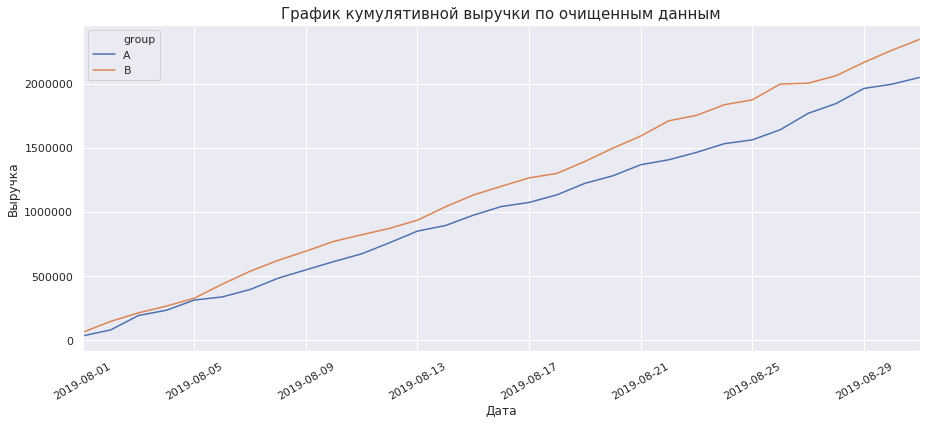

In [52]:
#построим график кумулятивной выручки
plt.figure(figsize = (15,6))
plt.title('График кумулятивной выручки по очищенным данным',size=15)
sns.lineplot(data=cumulativeData_filtered, x='date', y='revenue', hue='group')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=30)
plt.xlim(np.datetime64('2019-08-01 00:00:00'), np.datetime64('2019-08-31 00:00:00'))
plt.show()

По графику видно что кумулятивная выручка по очищенным данным была примерно одинаковой вплоть до 5 августа. Затем группа В немного вырвалась вперед и такой результат остался до конца исследования

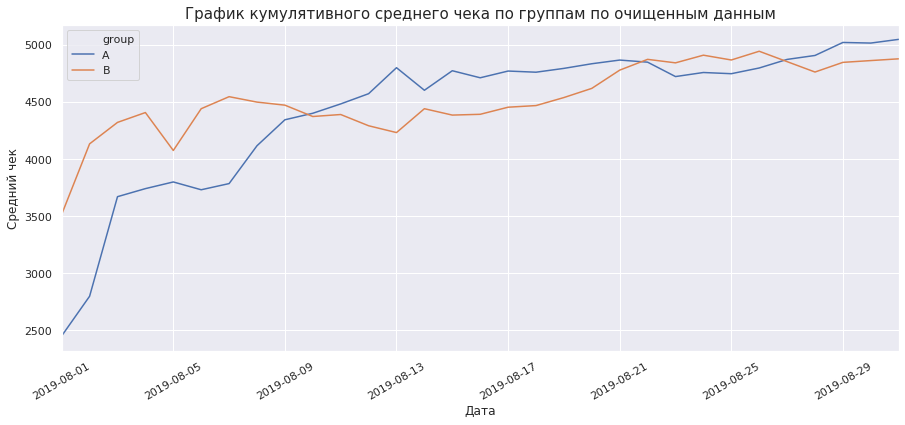

In [53]:
#построим график кумулятивного среднего чека по очищенным данным 
plt.figure(figsize=(15,6))
plt.title('График кумулятивного среднего чека по группам по очищенным данным', size=15)
sns.lineplot(data=cumulativeData_filtered, x='date', 
             y=cumulativeData_filtered['revenue']/cumulativeData_filtered['orders'], hue='group')
plt.xlabel('Дата')
plt.ylabel('Cредний чек')
plt.xlim(np.datetime64('2019-08-01 00:00:00'), np.datetime64('2019-08-31 00:00:00'))
plt.xticks(rotation=30)
plt.show()

Сильных различий в значениях средних чеков по обеим группам нет. Разделим данные на кумулятивные выручки по обеим группам:

In [54]:
cumulativeRevenueA_filtered = cumulativeData_filtered[\
    cumulativeData_filtered['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB_filtered = cumulativeData_filtered[\
    cumulativeData_filtered['group'] == 'B'][['date', 'revenue', 'orders']]

In [55]:
#Соберем данные в одном датафрейме
mergedCumulativeRevenue_filtered = cumulativeRevenueA_filtered.merge(cumulativeRevenueB_filtered, 
                                                                     left_on='date', right_on='date', 
                                                                       how='left', suffixes=['A', 'B'])

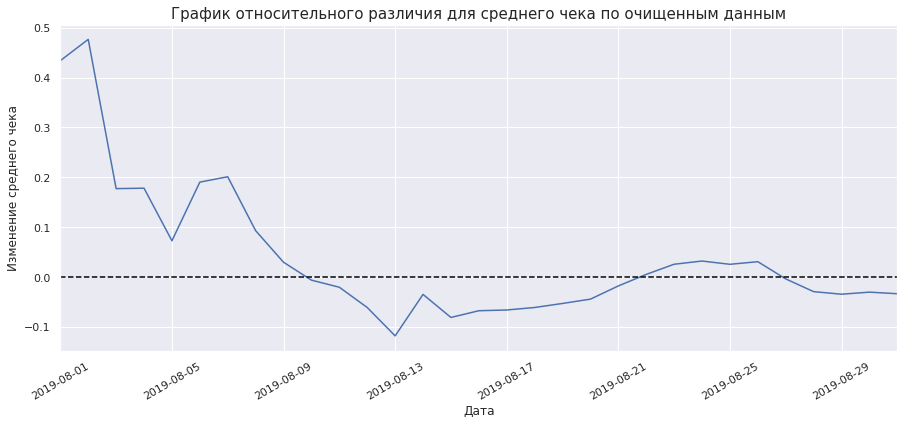

In [56]:
#Построим график относительного различия для среднего чека
plt.figure(figsize=(15, 6))
plt.title('График относительного различия для среднего чека по очищенным данным', size = 15)
sns.lineplot(data=mergedCumulativeRevenue_filtered, 
             x=mergedCumulativeRevenue_filtered['date'], 
             y=(mergedCumulativeRevenue_filtered['revenueB']/mergedCumulativeRevenue_filtered['ordersB'])
             /(mergedCumulativeRevenue_filtered['revenueA']/mergedCumulativeRevenue_filtered['ordersA'])-1)
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlim(np.datetime64('2019-08-01 00:00:00'), np.datetime64('2019-08-31 00:00:00'))
plt.show()

После чистки данных от выбросов мы видим, что сильные различия в чеках наблюдались в начале расматриваемого периода вплоть до 13 августа, затем обе группы сравнялись и наблюдались незначительные различия в средних чеках.

In [57]:
#Посчитаем кумулятивную конверсию.
cumulativeData_filtered['conversion'] = cumulativeData_filtered['orders'] / cumulativeData_filtered['visitors']

#Конверсия по группе А
cumulativeDataA_filtered = cumulativeData_filtered[cumulativeData_filtered['group'] == 'A']
#Конверсия по группе B
cumulativeDataB_filtered = cumulativeData_filtered[cumulativeData_filtered['group'] == 'B']

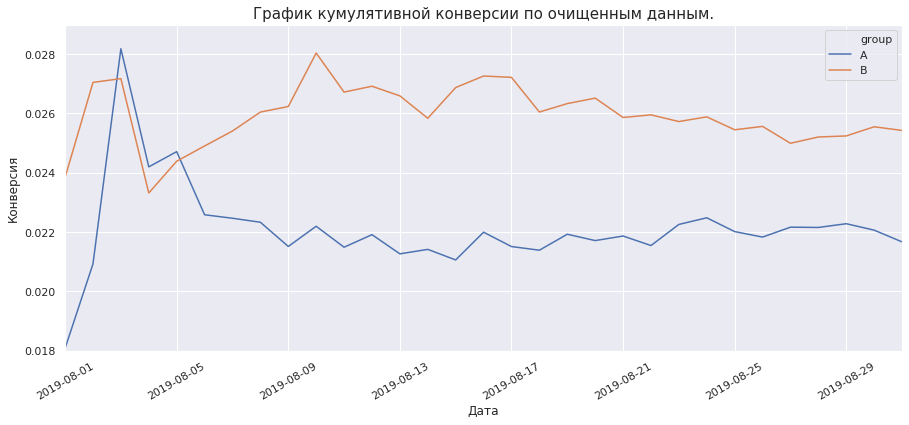

In [58]:
plt.figure(figsize = (15,6))
plt.title('График кумулятивной конверсии по очищенным данным.',size=15)
sns.lineplot(data=cumulativeData_filtered, x='date', y='conversion', hue='group')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=30)
plt.axis(["2019-08-01", '2019-08-31', 0.018, 0.029])
plt.show()

По графику видим, что в начале эксперимента конверсия группы A была выше конверсии групы B, но тендеция роста была схожей, затем после 6 августа 2019 года конверсия группы B стала сильно больше,а конверсия группы A просела. Конверсия группы B колебалась в диапазоне 0.025-0.028. Конверсия по очищенным данным не сильно отличается от конверсии по сырым данным.

Объединим конверсии по группе A и группе B в одну таблицу:

In [59]:
mergedCumulativeConvesions_filtered = cumulativeDataA_filtered[['date', 'conversion']].merge(
    cumulativeDataB_filtered[['date', 'conversion']], left_on='date', right_on='date', how='left',
                                                                         suffixes=['A', 'B'])

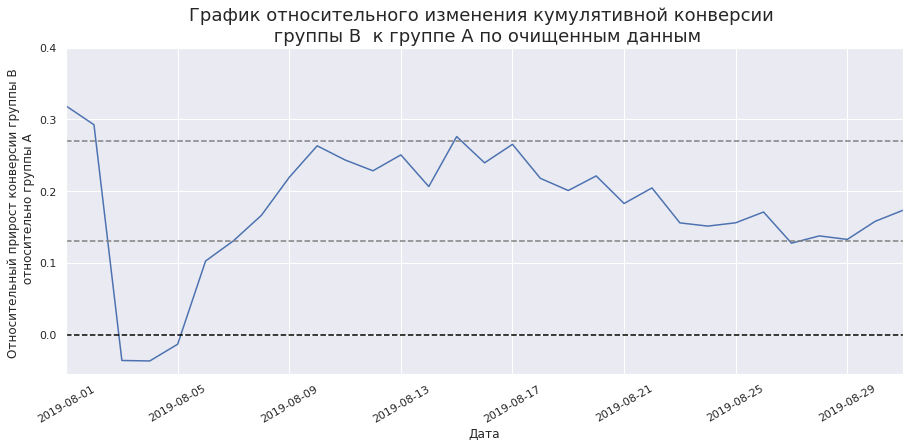

In [60]:
#Построим график относительного изменения кумулятивной конверсии группы B к группе A.

plt.figure(figsize=(15, 6))
plt.title('График относительного изменения кумулятивной конверсии \n группы B  к группе A по очищенным данным', size=18)
sns.lineplot(data=mergedCumulativeConvesions_filtered, x='date', 
             y=mergedCumulativeConvesions_filtered['conversionB']/mergedCumulativeConvesions_filtered['conversionA']-1)
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Относительный прирост конверсии группы B \n относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.27, color='grey', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')
plt.xlim(np.datetime64('2019-08-01 00:00:00'), np.datetime64('2019-08-31 00:00:00'))
plt.ylim(None, 0.4)
plt.show()

У группы B конверсия выше и относительный прирост конверсии в период с 8 августа до окончания теста колебался в диапазоне 0,13-0,27.

По результатам теста было принято решение остановить тест, зафиксировать победу группы B. Несмотря на то, что значимых различий среднего чека между двумя группами не наблюдается, у группы B выше конверсия, а значит мы успешно привлекаем и удерживаем пользователей. В долгосрочной перспективе это поможет сформировать стек лояльных постоянных покупателей, что приведет к стабильному росту выручки. Продолжать тест смысла нет, поскольку мы получили интерпретируемый результат и увидели влияние изменений на выручку и конверсию.

## Общие выводы по проекту

### Приоритезация гипотез

Исходя из графика мы можем сделать вывод что и для RICE и для ICE самыми перспективными гипотезами являются 7, 0, 2 и 6. Следовательно гипотезы 1, 3, 4 и 5 не будут полезными вовсе. Гипотеза 8 полезна только для ICE.

Во фреймворке RICE сильно выбилась гипотеза 7. Это произошло потому что показатель reach у этой гипотезы равен 10. На втором месте гипотеза 2, у которой reach так же высокий и равен 8. Этот параметр помогает оценить охват пользователей, которых затронет изменение, поэтому использование этого метода предпочтительно.

### Анализ по сырым данным

 - Выручка на протяжении всего периода стабильно увеличивается. Выручка группы B резко возрастает на одном участке (18-19 августа), что может сигнализировать об аномальных значениях в данных (всплеск числа заказов, либо появление очень дорогих заказов в выборке).
 - Наблюдается тенденция роста среднего чека по группе A и B. Причем 13 августа 2019 года по группе B наблюдается резкий рост среднего чека по группе A. Предполагается наличие выбросов в этот момент времени (возможно нетипично дорогие заказы). По группе B наблюдается резкий рост 19 августа 2019 года (опять же может быть из-за очень дорогих заказов), далее показатель выравнивается по обеим группам.
 - Различия между средними чеками группы A и группы B "скачут", что свидетельствует о наличии выбросов. Скорее всего в данных присутствуют крупные заказы, которые искажают картину по средним чекам.
 - В начале эксперимента конверсия группы A была выше конверсии групы B, но тендеция роста была схожей, затем после 6 августа 2019 года конверсия группы B стала сильно больше,а конверсия группы A просела. Конверсия группы B колебалась в диапазоне 0.029-0.030.
 - Наибольшее количество пользователей (около 800) совершили 1 покупку. Пользователей, которые совершили 2 покупки меньше - около 70. Все, что свыше 2-х покупок - выбросы.
 - Не более 5% пользователей оформляли больше двух заказов. И 10% пользователей заказывали более 1 раза.
 - Больше всего пользователей совершало заказы со стоимостью ниже 50 000 руб
 - Не более 5% пользователей совершили покупки дороже 26 785 руб. и не более 1% дороже 53 904 руб. Пусть граница аномальных значений проходит в диапазоне свыше 26 785 руб.

### Анализ по очищенным данным

 - Выручка групп A и B была примерно одинаковой вплоть до 5 августа, затем выручка по группе B стала выше кумулятивной выручки по группе A и сохранила такой результат до конца рассматриваемого периода.
 - Средний чек по группе B в начале исследования был выше среднего чека по группе A, затем в период с 3 августа по 12 августа стал ниже среднего чека группы A. В период с 14 по 30 августа средние чеки по обеим группам незначительно колебались в диапазоне 4500-5000 рублей. Сильных различий в значениях средних чеков по обеим группам не наблюдается.
 - После чистки данных от выбросов мы видим, что сильные различия в чеках наблюдались в начале расматриваемого периода вплоть до 13 августа, затем обе группы сравнялись и наблюдались незначительные различия в средних чеках.
 - По графику видим, что в начале эксперимента конверсия группы A была выше конверсии групы B, но тендеция роста была схожей, затем после 6 августа 2019 года конверсия группы B стала сильно больше,а конверсия группы A просела. Конверсия группы B колебалась в диапазоне 0.025-0.028. Конверсия по очищенным данным не сильно отличается от конверсии по сырым данным.
 - У группы B конверсия выше и относительный прирост конверсии в период с 8 августа до окончания теста колебался в диапазоне 0,13-0,27.

### Результаты тестировния гипотез на сырых данных

 - p-value = 0.011 по критерию Манна-Уитни меньше критического уровня статистической значимости 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем и не отвергаем альтернативную гипотезу - значимые различия между сравниваемыми выборками есть. Относительный выигрыш группы B - 16%.
 - В результате проверки гипотезы о значимых различиях между сравниваемыми выборками среднего чека получили p-value=0.829, что значительно выше критического уровня статистической значимости 5%, а значит мы не отвергаем нулевую гипотезу о том, что статистически значимых различий между группами нет.
 - В результате проверки относительных различий в среднем чеке получили, что средний чек группы B почти на 28.7% выше среднего чека группы A.

### Результат тестирования гипотез на очищенных данных 

 - Всего 58 аномальных посетителей. Мы приняли за аномальных пользователей тех, кто совершил больше 2 заказов или совершил заказ дороже 26 785 рублей.
 - p-value = 0.012 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем и не отвергаем альтернативную гипотезу - значимые различия между сравниваемыми выборками есть. Относительный выигрыш группы B - 18.2%.
 - Результаты теста Манна-Уитни по очищенным данным в отошении конверсии практически не изменились.
 - p-value увеличился по сравнению с результатом, полученным на сырых данных. В результате проверки гипотезы о значимых различиях между сравниваемыми выборками среднего чека получили p-value=0.646, что значительно выше критического уровня статистической значимости 5%, а значит мы не отвергаем нулевую гипотезу.

### Общий результат

По результатам теста было принято решение остановить тест, зафиксировать победу группы B. Несмотря на то, что значимых различий среднего чека между двумя группами не наблюдается, у группы B выше конверсия, а значит мы успешно привлекаем и удерживаем пользователей. В долгосрочной перспективе это поможет сформировать стек лояльных постоянных покупателей, что приведет к стабильному росту выручки. Продолжать тест смысла нет, поскольку мы получили интерпретируемый результат и увидели влияние изменений на выручку и конверсию